In [2]:
import numpy
import matplotlib.pyplot as plt
import lightkurve as lk
import seaborn
import scipy.stats
import pandas
import astropy.units as units
from astropy import constants
import pickle
%matplotlib inline

#### An example of period determination for K2-240 active M dwarf
The cell below will execute search in MAST for specific target name (you can use an indentifier of your choise: star name, KIC, TIC, EPIC, KOI or TOI, if available)

In [4]:
search_result = lk.search_lightcurve("K2-240", author="K2", cadence="long")
search_result


#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,K2 Campaign 15,2017,K2,1800,ktwo249801827,0.0


The cell below calculates a periodogram, plots the graf and fits the obtained period into the light curve.

   mission    
--------------
K2 Campaign 15
10.888812743272728


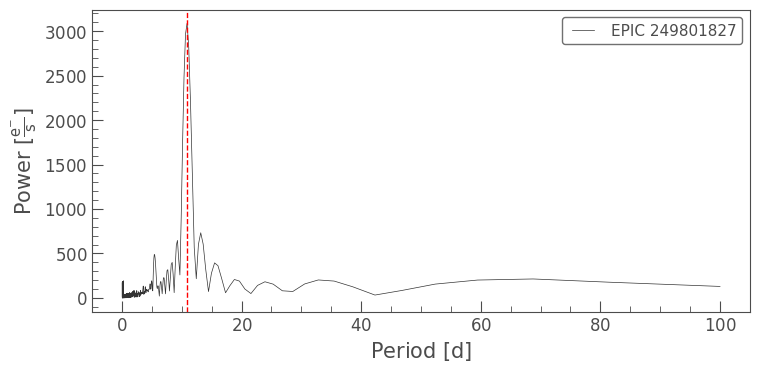

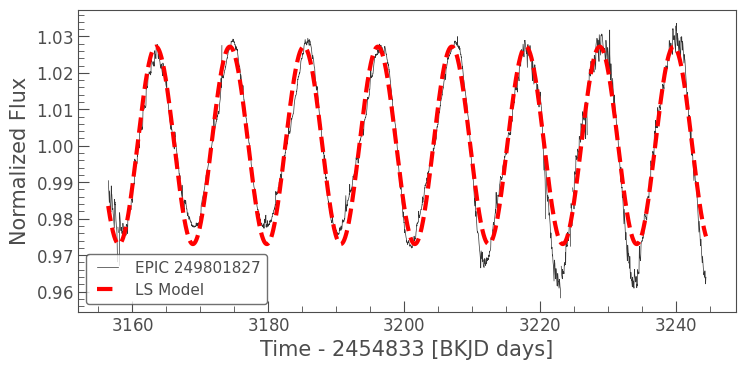

In [12]:
name = "K2-240"

print(search_result.table["mission"])

lc = search_result.download()
# lc.plot();
no_nan_lc = lc.remove_nans()
clipped_lc = no_nan_lc.remove_outliers(sigma=3)
pg = clipped_lc.to_periodogram(maximum_period=100,normalization="amplitude")
pg.plot()

period = pg.period_at_max_power

period = period.value
plt.axvline(period,lw=1, ls='--', c='red')

print(period)

# # Create a model light curve for the highest peak in the periodogram
# lc_model = pg.model(time=lc.time, frequency=pg.frequency_at_max_power)
# # Plot the light curve

# ax = lc.plot()
# # Plot the model light curve on top
# lc_model.plot(ax=ax, lw=3, ls='--', c='red');

lc_model = pg.model(time=lc.time, frequency=pg.frequency_at_max_power)
# Plot the light curve
lc = lc.normalize()
ax = lc.plot()
# Plot the model light curve on top
lc_model.plot(ax=ax, lw=3, ls='--', c='red');